In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2 # comment out in local notebook

In [2]:
img_array = cv2.imread("Training/0/Training_3908.jpg")

In [3]:
img_array.shape

(48, 48, 3)

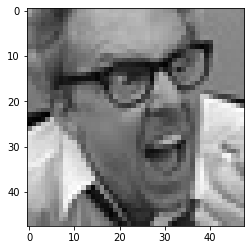

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = "Training/" # This is where the training dataset directory

In [6]:
Classes = ["0","1","2","3","4","5","6"] # list of classes = > exact name of your folders

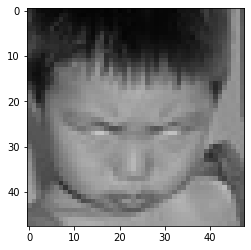

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

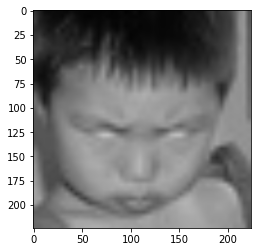

In [8]:
img_size = 224 # ImageNet => 224 x 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

### Read all the images and convert them to array

In [10]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data))

28709


In [13]:
temp = np.array(training_Data)

In [14]:
temp.shape

(28709, 2)

In [15]:
import random

random.shuffle(training_Data)

In [16]:
X = [] # data /feature
y = [] # label

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4 dimension

In [25]:
X = X[:1000]
y = y[:1000]

In [26]:
X.shape

(1000, 224, 224, 3)

In [27]:
# normalize the data
X = X/255.0 # we are normalizing it

In [28]:
type(y)

list

In [29]:
Y = np.array(y)

In [30]:
Y.shape

(1000,)

# Training

# Model Training - Transfer Learning

In [31]:
# Import statements

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
# Model Declaration
# model = tf.keras.applications.MobileNetV2() ## Pre-trained Model
model = tf.keras.applications.ResNet50V2()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
102875136/102869336 [==============================] - 69s 1us/step


In [34]:
# Model architecture details
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [39]:
base_input = model.layers[0].input

In [40]:
base_output = model.layers[-2].output

In [41]:
final_output = layers.Dense(128)(base_output) ## adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) ## activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) ## classification layer

In [42]:
final_output

<tf.Tensor 'dense_5/Softmax:0' shape=(?, 7) dtype=float32>

In [43]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [44]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [45]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [46]:
new_model.fit(X,Y, epochs=2)

Train on 1000 samples
Epoch 1/2
1000/1000 [==============================] - 254s 254ms/sample - loss: 1.7325 - acc: 0.3040
Epoch 2/2
1000/1000 [==============================] - 258s 258ms/sample - loss: 1.5921 - acc: 0.3860


In [47]:
new_model.save('Final_model_95p07.h5')

In [48]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Testing

In [49]:
frame = cv2.imread("test_happy.jpg")

In [50]:
frame.shape

(48, 48, 3)

In [51]:
frame_surprise = cv2.imread("test_surprise.jpg")

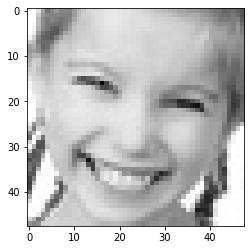

In [52]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [53]:
# Face detection algo

In [54]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [55]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [56]:
gray.shape

(48, 48)

In [57]:
# Image cropping and to gray
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

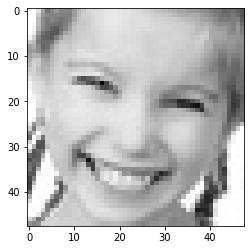

In [58]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [59]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

NameError: name 'face_roi' is not defined

In [60]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [61]:
Predictions = new_model.predict(final_image)

In [62]:
Predictions[0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.8065046e-31,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [63]:
np.argmax(Predictions)

0

In [64]:
# For surprise
final_image = cv2.resize(frame_surprise, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0
Predictions = new_model.predict(final_image)
np.argmax(Predictions)

0

In [65]:
# TEST FOR SAD (Difficult)
frame_sad = cv2.imread("test/sad/PrivateTest_2480725.jpg")
final_image = cv2.resize(frame_sad, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0
Predictions = new_model.predict(final_image)
np.argmax(Predictions)

0

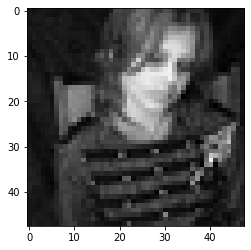

In [66]:
plt.imshow(cv2.cvtColor(frame_sad, cv2.COLOR_BGR2RGB))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f9b9120e-56bd-4096-9e37-f3a4936c6403' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>